# Strength of Concrete prediction using Decision Tree Regressor
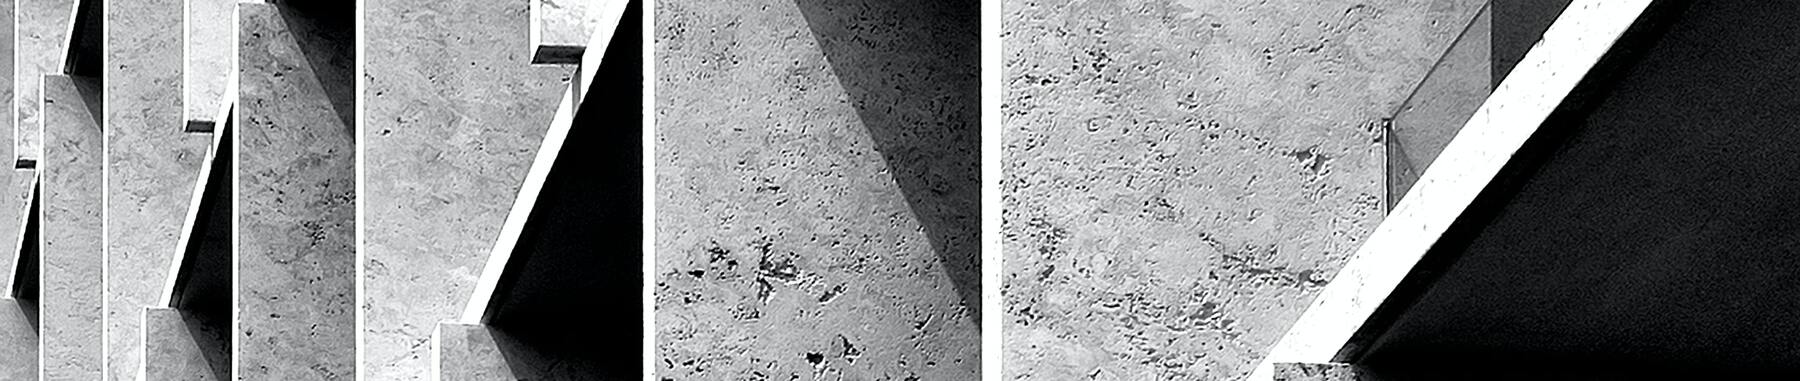
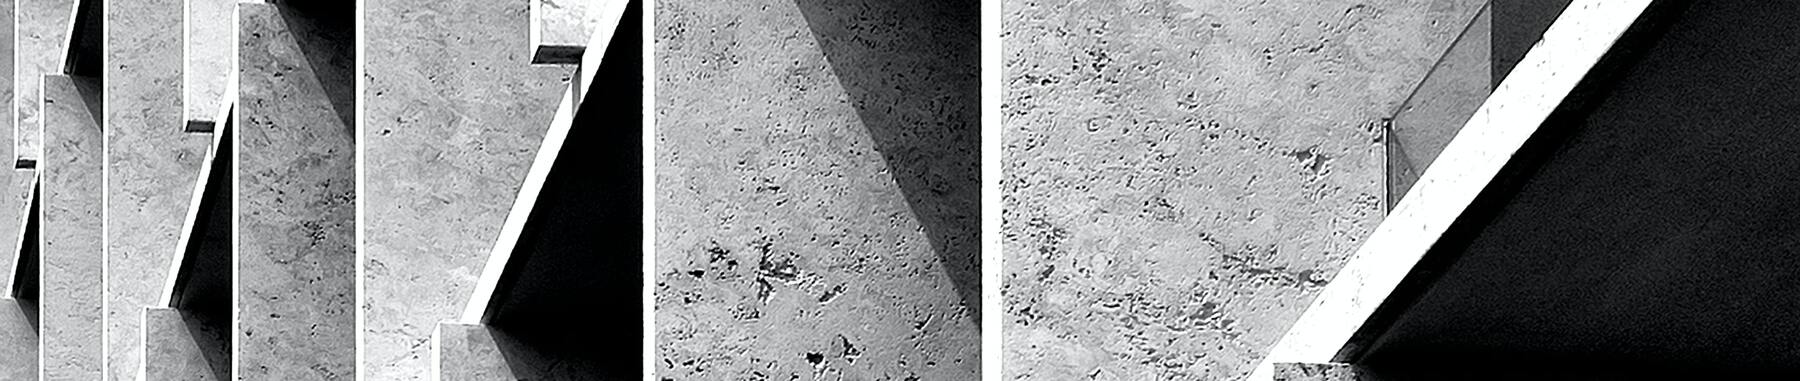

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as m

In [104]:
dataset = pd.read_csv('concrete_data.csv')
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<AxesSubplot:>

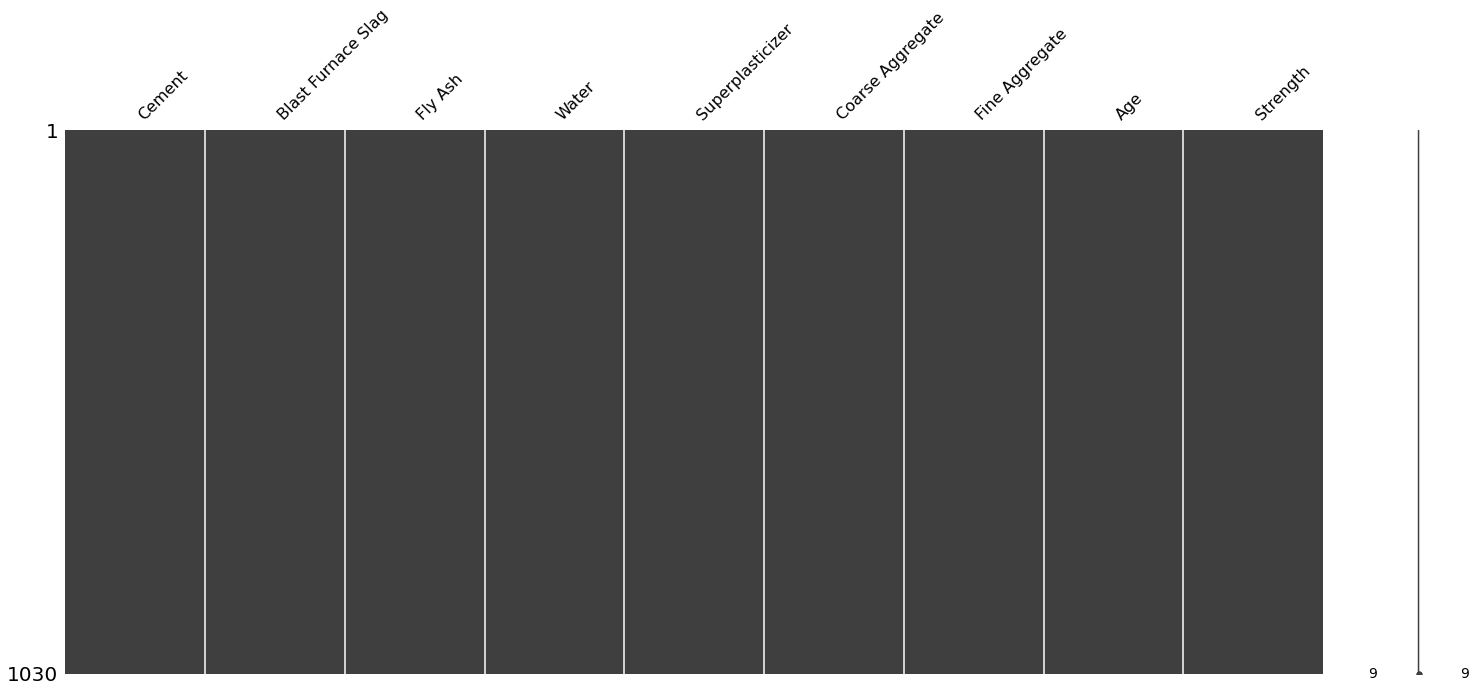

In [105]:
m.matrix(dataset)

### This Dataset has Not a Single Missing Value

In [106]:
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Data Analysis

In [107]:
import plotly.express as px
fig = px.violin(dataset, x="Cement",title = 'Cement', box=True, points = 'all')
fig.show()

In [108]:
fig = px.violin(dataset, x="Blast Furnace Slag",title = 'Blast Furnace Slag', box=True, points = 'all')
fig.show()

In [109]:
fig = px.violin(dataset, x="Fly Ash",title = 'Fly Ash',box=True,points='all')
fig.show()

In [110]:
fig = px.histogram(dataset, x="Water",title = 'Water')
fig.show()

In [111]:
fig = px.box(dataset, x="Superplasticizer",title = 'Superplasticizer')
fig.show()

In [112]:
fig = px.violin(dataset, x="Coarse Aggregate",title = 'Coarse Aggregate',box=True, points='all')
fig.show()

In [113]:
fig = px.histogram(dataset, x="Fine Aggregate",title = 'Fine Aggregate')
fig.show()

In [114]:
fig = px.violin(dataset, x="Age",title = 'Age',box=True, points='all')
fig.show()

In [115]:
fig = px.violin(dataset, x="Strength",title = 'Strength',box=True, points='all')
fig.show()

# Level Up Data Analysis

In [118]:
fig = px.scatter(dataset, x="Cement", y="Blast Furnace Slag",
                 size="Age", color='Fly Ash' ,hover_name="Strength", title ='Cement vs Blast Furnace Slag vs Age vs Fly Ash vs Strength')
fig.show()

In [117]:
fig = px.histogram(dataset, x="Water", y="Superplasticizer", color="Age",title = 'Water vs Superplasticizer vs Age')
                   
fig.show()

In [100]:
fig = px.scatter_3d(dataset, x='Cement', y='Coarse Aggregate', z='Fine Aggregate',
              color='Age')
fig.show()

In [101]:
fig = px.scatter_3d(dataset, x='Cement', y='Blast Furnace Slag', z='Water', size='Superplasticizer', color='Coarse Aggregate',
                    hover_data=['Age'])
fig.show()

In [56]:
import plotly.graph_objects as go

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Surface(z=dataset.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
        x=0, y=1.085, yref="paper", align="left")
    ]
)

fig.show()

# Heatmap

<AxesSubplot:>

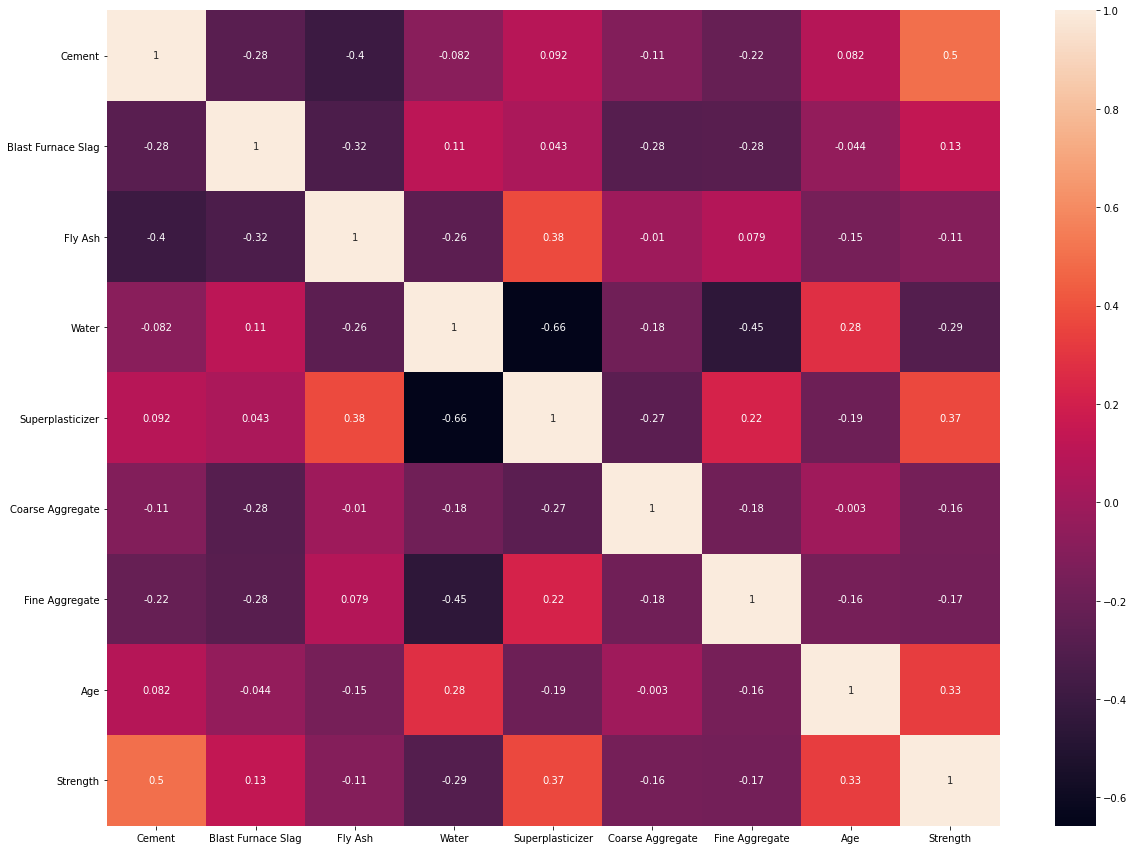

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sns.heatmap(dataset.corr(), annot=True)

In [58]:
df = dataset

In [59]:
y = df.pop('Strength')
X = df

# Divide into X and y 

In [60]:
X=X.values
y=y.values

In [61]:
print(X.shape)

(1030, 8)


In [62]:
print(y)

[79.99 61.89 40.27 ... 23.7  32.77 32.4 ]


In [63]:
y = y.reshape(len(y),1)

# Split into Train Test set

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling 

In [65]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

# Implementing Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [67]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
data

array([[12.64, 26.06],
       [ 7.72, 10.35],
       [79.3 , 79.3 ],
       [60.28, 74.99],
       [10.76,  9.69],
       [47.65, 47.1 ],
       [58.52, 59.  ],
       [23.51, 22.72],
       [79.99, 61.89],
       [56.14, 52.12],
       [17.58, 17.54],
       [40.39, 48.15],
       [29.45, 38.33],
       [12.37, 17.2 ],
       [68.3 , 56.83],
       [56.14, 55.25],
       [41.89, 33.36],
       [35.76, 34.68],
       [59.76, 52.61],
       [35.86, 39.94],
       [56.34, 61.46],
       [26.94, 27.63],
       [21.5 , 32.9 ],
       [59.76, 41.64],
       [14.54, 17.54],
       [25.18, 26.85],
       [60.29, 66.9 ],
       [31.35, 21.06],
       [56.14, 61.07],
       [66.82, 66.95],
       [17.58, 20.87],
       [48.85, 48.79],
       [24.28, 24.05],
       [27.83, 47.81],
       [21.18, 21.16],
       [ 9.13,  6.94],
       [36.3 , 28.6 ],
       [25.37, 26.31],
       [32.63, 33.95],
       [37.27, 25.72],
       [39.3 , 37.8 ],
       [31.35, 35.17],
       [32.25, 32.24],
       [46.

# Prediction for New Data

In [68]:
a=sc_y.inverse_transform(regressor.predict([[530.0 ,2.0 ,0.0 ,150.0 ,2 ,1000 ,700 ,30 ]]))
a

array([73.3])

# Accuracy

In [81]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2 = np.around(r2, decimals=2, out=None)
r2 = r2*100
print(f"Accuracy : {r2}%")

Accuracy : 80.0%


In [70]:
dataset = pd.DataFrame({'y_test': data[:, 0], 'y_pred': data[:, 1]})
dataset.to_csv('accuracy.csv')

In [71]:
dataset = pd.read_csv('accuracy.csv')
dataset

,Unnamed: 0,y_test,y_pred
0,0,12.64,26.06
1,1,7.72,10.35
2,2,79.30,79.30
3,3,60.28,74.99
4,4,10.76,9.69
...,...,...,...
201,201,27.83,27.53
202,202,33.76,33.76
203,203,17.82,33.01
204,204,39.42,33.72


# Plotting Actual and Predicted Values

In [72]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_test'], name='Actual Value',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_pred'], name = 'Predicted Value',
                         line=dict(color='firebrick', width=2)))



## This model can Predict the Strength of a Concrete with an Accuracy of 80%